In [75]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd
from pandas.tseries.offsets import MonthBegin
from pandas.tseries.offsets import QuarterEnd
from pandas.tseries.offsets import QuarterBegin
from pandas.tseries.offsets import YearEnd
from pandas.tseries.offsets import YearBegin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('VTI - 2013 to 2018 - practice dataset.csv', parse_dates=['Date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1508 non-null   datetime64[ns]
 1   Open       1508 non-null   float64       
 2   High       1508 non-null   float64       
 3   Low        1508 non-null   float64       
 4   Close      1508 non-null   float64       
 5   Adj Close  1508 non-null   float64       
 6   Volume     1508 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.6 KB


In [5]:
df['Date'].sort_values(ascending=False)

1507   2018-12-27
1506   2018-12-26
1505   2018-12-24
1504   2018-12-21
1503   2018-12-20
          ...    
4      2013-01-08
3      2013-01-07
2      2013-01-04
1      2013-01-03
0      2013-01-02
Name: Date, Length: 1508, dtype: datetime64[ns]

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1.508000e+03
mean,110.972865,111.424529,110.415504,110.956585,99.723218,2.673256e+06
std,18.765803,18.829856,18.672404,18.736166,20.002527,1.608571e+06
min,74.529999,75.150002,74.500000,75.010002,63.432388,5.524000e+05
25%,98.232498,98.614998,97.492500,98.117503,86.169901,1.741050e+06
50%,107.419998,107.844997,106.944999,107.409999,95.556641,2.262750e+06
75%,124.982502,125.364999,124.564999,125.042502,115.011828,3.077175e+06
max,151.820007,151.839996,151.050003,151.309998,141.990128,1.813700e+07


In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,74.529999,75.150002,74.500000,75.139999,63.542343,5037200
1,2013-01-03,75.120003,75.370003,74.839996,75.029999,63.449295,2634600


In [10]:
#Building the following features:
    # year
    # month
    # week
    # dayofmonth
    # dayofweek
    # dayofyear
    # is_month_end
    # is_month_start
    # is_quarter_end
    # is_quarter_start
    # is_year_end
    # is_year_start

In [11]:
df['Year'] = df['Date'].dt.year

In [12]:
df['Month'] = df['Date'].dt.month

In [13]:
df['Week'] = df['Date'].dt.isocalendar().week

In [14]:
df['Day_Month'] = df['Date'].dt.days_in_month

In [15]:
df['Weekday'] = df['Date'].dt.day_of_week

In [16]:
df['Day_Year'] = df['Date'].dt.day_of_year

In [17]:
df['Month_End'] = df['Date'] + MonthEnd()

In [18]:
df['Month_Start'] = df['Date'] + MonthBegin()

In [19]:
df['Quarter_end'] = df['Date'] + QuarterEnd()

In [20]:
df['Quarter_Start'] = df['Date'] + QuarterBegin()

In [21]:
df['Year_end'] = df['Date'] + YearEnd()

In [22]:
df['Year_Start'] = df['Date'] + YearBegin()

In [23]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Week,Day_Month,Weekday,Day_Year,Month_End,Month_Start,Quarter_end,Quarter_Start,Year_end,Year_Start
0,2013-01-02,74.529999,75.150002,74.500000,75.139999,63.542343,5037200,2013,1,1,31,2,2,2013-01-31,2013-02-01,2013-03-31,2013-03-01,2013-12-31,2014-01-01
1,2013-01-03,75.120003,75.370003,74.839996,75.029999,63.449295,2634600,2013,1,1,31,3,3,2013-01-31,2013-02-01,2013-03-31,2013-03-01,2013-12-31,2014-01-01


In [ ]:
#Exploratory Data Analysis (EDA)

<AxesSubplot:>

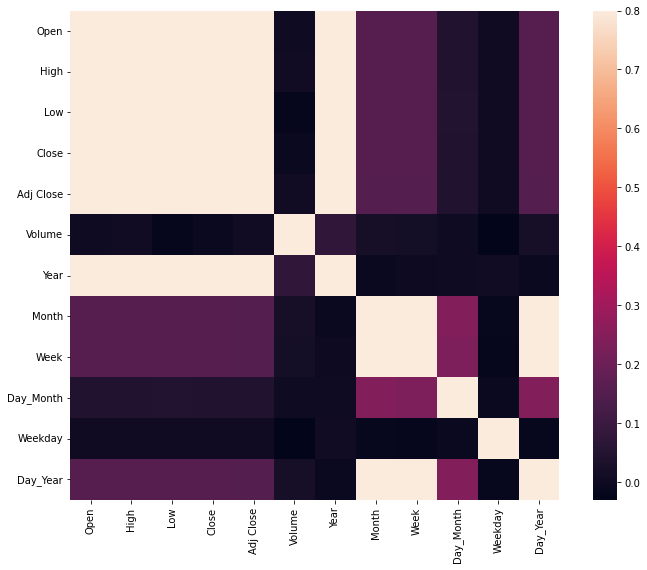

In [24]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [25]:
df.dtypes

Date             datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Close                   float64
Adj Close               float64
Volume                    int64
Year                      int64
Month                     int64
Week                     UInt32
Day_Month                 int64
Weekday                   int64
Day_Year                  int64
Month_End        datetime64[ns]
Month_Start      datetime64[ns]
Quarter_end      datetime64[ns]
Quarter_Start    datetime64[ns]
Year_end         datetime64[ns]
Year_Start       datetime64[ns]
dtype: object

In [26]:
df.shape

(1508, 19)

In [27]:
df.dtypes

Date             datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Close                   float64
Adj Close               float64
Volume                    int64
Year                      int64
Month                     int64
Week                     UInt32
Day_Month                 int64
Weekday                   int64
Day_Year                  int64
Month_End        datetime64[ns]
Month_Start      datetime64[ns]
Quarter_end      datetime64[ns]
Quarter_Start    datetime64[ns]
Year_end         datetime64[ns]
Year_Start       datetime64[ns]
dtype: object

In [28]:
df['Close'].describe()

count    1508.000000
mean      110.956585
std        18.736166
min        75.010002
25%        98.117503
50%       107.409999
75%       125.042502
max       151.309998
Name: Close, dtype: float64

c:\Users\Eduardo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

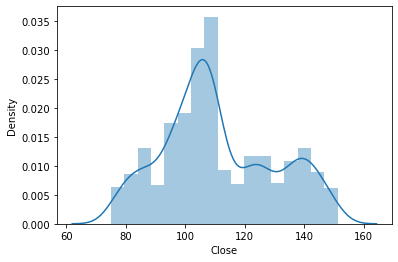

In [29]:
sns.distplot(df['Close'])

<AxesSubplot:xlabel='Month', ylabel='Close'>

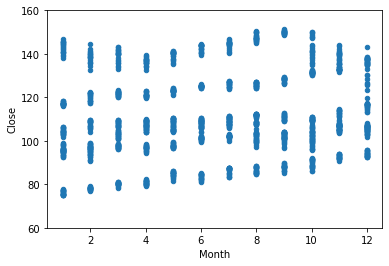

In [30]:
var = 'Month'
data = df[['Close',var]]
data.plot.scatter(x=var,y='Close', ylim=(60,160))


<AxesSubplot:xlabel='Close', ylabel='Month'>

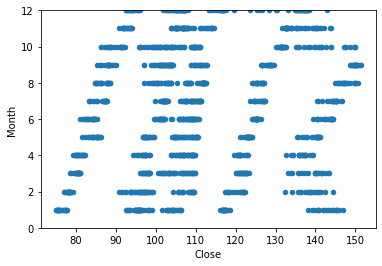

In [31]:
var = 'Close'
data = df[['Month',var]]
data.plot.scatter(x=var,y='Month', ylim=(0,12))

<AxesSubplot:xlabel='Weekday', ylabel='Close'>

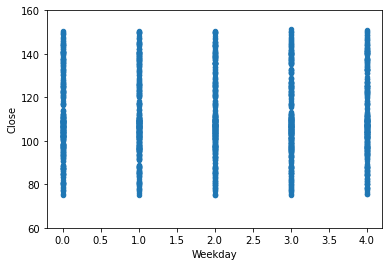

In [32]:
var = 'Weekday'
data = df[['Close',var]]
data.plot.scatter(x=var,y='Close', ylim=(60,160))

<AxesSubplot:>

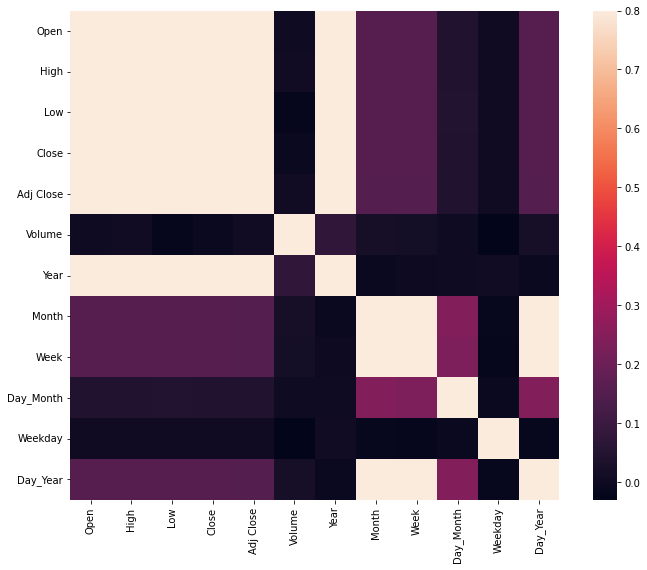

In [33]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

<AxesSubplot:xlabel='Date', ylabel='Close'>

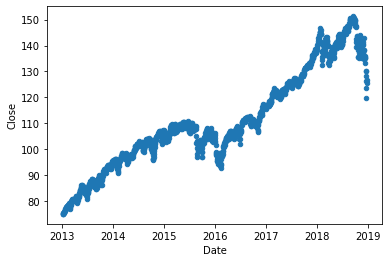

In [34]:
var = 'Date'
data = df[['Close',var]]
data.plot.scatter(x=var,y='Close')

<AxesSubplot:xlabel='Date', ylabel='Open'>

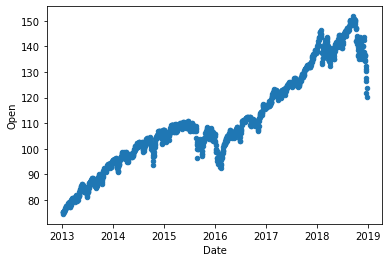

In [35]:
var = 'Date'
data = df[['Open',var]]
data.plot.scatter(x=var,y='Open')

In [ ]:
#XGBoost Setup and model

In [36]:
X = df[['High', 'Low', 'Volume','Month']]
y = df[['Close']]

In [37]:
y.shape

(1508, 1)

In [38]:
scaler = MinMaxScaler()
df_scaled_X = scaler.fit_transform(X)
df_scaled_y = scaler.fit_transform(y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled_X, df_scaled_y, test_size=0.2, random_state=0)

In [40]:
reg = XGBRegressor(n_estimators=100, learning_rate=0.01)
reg.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)], eval_metric='mae')

[0]	validation_0-mae:0.20530	validation_1-mae:0.20651
[1]	validation_0-mae:0.20328	validation_1-mae:0.20448
[2]	validation_0-mae:0.20128	validation_1-mae:0.20247
[3]	validation_0-mae:0.19929	validation_1-mae:0.20048
[4]	validation_0-mae:0.19733	validation_1-mae:0.19851
[5]	validation_0-mae:0.19538	validation_1-mae:0.19658
[6]	validation_0-mae:0.19345	validation_1-mae:0.19465
[7]	validation_0-mae:0.19154	validation_1-mae:0.19274
[8]	validation_0-mae:0.18965	validation_1-mae:0.19086
[9]	validation_0-mae:0.18778	validation_1-mae:0.18900
[10]	validation_0-mae:0.18593	validation_1-mae:0.18714
[11]	validation_0-mae:0.18410	validation_1-mae:0.18530
[12]	validation_0-mae:0.18228	validation_1-mae:0.18349
[13]	validation_0-mae:0.18049	validation_1-mae:0.18169
[14]	validation_0-mae:0.17871	validation_1-mae:0.17991
[15]	validation_0-mae:0.17695	validation_1-mae:0.17813
[16]	validation_0-mae:0.17521	validation_1-mae:0.17638
[17]	validation_0-mae:0.17348	validation_1-mae:0.17465
[18]	validation_0-ma

c:\Users\Eduardo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[73]	validation_0-mae:0.09970	validation_1-mae:0.10068
[74]	validation_0-mae:0.09872	validation_1-mae:0.09970
[75]	validation_0-mae:0.09775	validation_1-mae:0.09872
[76]	validation_0-mae:0.09679	validation_1-mae:0.09775
[77]	validation_0-mae:0.09584	validation_1-mae:0.09681
[78]	validation_0-mae:0.09490	validation_1-mae:0.09586
[79]	validation_0-mae:0.09396	validation_1-mae:0.09492
[80]	validation_0-mae:0.09304	validation_1-mae:0.09399
[81]	validation_0-mae:0.09213	validation_1-mae:0.09307
[82]	validation_0-mae:0.09122	validation_1-mae:0.09216
[83]	validation_0-mae:0.09032	validation_1-mae:0.09126
[84]	validation_0-mae:0.08943	validation_1-mae:0.09037
[85]	validation_0-mae:0.08855	validation_1-mae:0.08949
[86]	validation_0-mae:0.08768	validation_1-mae:0.08861
[87]	validation_0-mae:0.08682	validation_1-mae:0.08774
[88]	validation_0-mae:0.08597	validation_1-mae:0.08689
[89]	validation_0-mae:0.08512	validation_1-mae:0.08604
[90]	validation_0-mae:0.08428	validation_1-mae:0.08520
[91]	valid

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [49]:
predictions = reg.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1)).reshape(-1)

In [50]:
df['Predictions'] = pd.Series(predictions)


In [51]:
df['Predictions']

0       102.901932
1       118.475029
2        91.589493
3       108.344582
4        91.589493
           ...    
1503           NaN
1504           NaN
1505           NaN
1506           NaN
1507           NaN
Name: Predictions, Length: 1508, dtype: float32

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1508 non-null   datetime64[ns]
 1   Open           1508 non-null   float64       
 2   High           1508 non-null   float64       
 3   Low            1508 non-null   float64       
 4   Close          1508 non-null   float64       
 5   Adj Close      1508 non-null   float64       
 6   Volume         1508 non-null   int64         
 7   Year           1508 non-null   int64         
 8   Month          1508 non-null   int64         
 9   Week           1508 non-null   UInt32        
 10  Day_Month      1508 non-null   int64         
 11  Weekday        1508 non-null   int64         
 12  Day_Year       1508 non-null   int64         
 13  Month_End      1508 non-null   datetime64[ns]
 14  Month_Start    1508 non-null   datetime64[ns]
 15  Quarter_end    1508 n

In [53]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Week,Day_Month,Weekday,Day_Year,Month_End,Month_Start,Quarter_end,Quarter_Start,Year_end,Year_Start,Predictions
0,2013-01-02,74.529999,75.150002,74.500000,75.139999,63.542343,5037200,2013,1,1,31,2,2,2013-01-31,2013-02-01,2013-03-31,2013-03-01,2013-12-31,2014-01-01,102.901932
1,2013-01-03,75.120003,75.370003,74.839996,75.029999,63.449295,2634600,2013,1,1,31,3,3,2013-01-31,2013-02-01,2013-03-31,2013-03-01,2013-12-31,2014-01-01,118.475029


In [ ]:
# Principal Component Analysis (PCA)

In [64]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Week,Day_Month,Weekday,Day_Year,Month_End,Month_Start,Quarter_end,Quarter_Start,Year_end,Year_Start,Predictions
0,2013-01-02,74.529999,75.150002,74.500000,75.139999,63.542343,5037200,2013,1,1,31,2,2,2013-01-31,2013-02-01,2013-03-31,2013-03-01,2013-12-31,2014-01-01,102.901932
1,2013-01-03,75.120003,75.370003,74.839996,75.029999,63.449295,2634600,2013,1,1,31,3,3,2013-01-31,2013-02-01,2013-03-31,2013-03-01,2013-12-31,2014-01-01,118.475029


In [62]:
df['Week'] = df['Week'].astype(int)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1508 non-null   datetime64[ns]
 1   Open           1508 non-null   float64       
 2   High           1508 non-null   float64       
 3   Low            1508 non-null   float64       
 4   Close          1508 non-null   float64       
 5   Adj Close      1508 non-null   float64       
 6   Volume         1508 non-null   int64         
 7   Year           1508 non-null   int64         
 8   Month          1508 non-null   int64         
 9   Week           1508 non-null   int32         
 10  Day_Month      1508 non-null   int64         
 11  Weekday        1508 non-null   int64         
 12  Day_Year       1508 non-null   int64         
 13  Month_End      1508 non-null   datetime64[ns]
 14  Month_Start    1508 non-null   datetime64[ns]
 15  Quarter_end    1508 n

In [67]:
features = ['Open','High','Low','Close','Adj Close','Volume','Year','Month','Week','Day_Month','Weekday','Day_Year']
features_time = ['Date','Month_End','Month_Start','Quarter_end','Quarter_Start','Year_end','Year_Start']

X_PCA = df.loc[:,features].values
Y_PCA = df.loc[:,'Close'].values

X_PCA_Scaled = StandardScaler().fit_transform(X_PCA)

In [74]:
df_PCA = pd.DataFrame(X_PCA_Scaled, columns=features)
df_PCA

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Week,Day_Month,Weekday,Day_Year
0,-1.942627,-1.927076,-1.924092,-1.912262,-1.809415,1.470080,-1.461916,-1.619259,-1.719216,0.67482,-0.015163,-1.737830
1,-1.911176,-1.915388,-1.905877,-1.918135,-1.814069,-0.024039,-1.461916,-1.619259,-1.719216,0.67482,0.699408,-1.728252
2,-1.910110,-1.907420,-1.897841,-1.897847,-1.797998,-0.099721,-1.461916,-1.619259,-1.719216,0.67482,1.413979,-1.718673
3,-1.907978,-1.920170,-1.899984,-1.908525,-1.806456,-0.100779,-1.461916,-1.619259,-1.652187,0.67482,-1.444305,-1.689938
4,-1.911709,-1.925482,-1.913377,-1.919203,-1.814914,-0.786894,-1.461916,-1.619259,-1.652187,0.67482,-0.729734,-1.680360
...,...,...,...,...,...,...,...,...,...,...,...,...
1503,0.881530,0.900756,0.770617,0.812250,0.962224,6.496393,1.468913,1.598311,1.632273,0.67482,0.699408,1.633751
1504,0.828224,0.878974,0.680615,0.669164,0.835852,6.798189,1.468913,1.598311,1.632273,0.67482,1.413979,1.643329
1505,0.582483,0.590507,0.495789,0.466814,0.690287,7.347617,1.468913,1.598311,1.699303,0.67482,-1.444305,1.672064
1506,0.499325,0.748818,0.478645,0.774343,0.963488,6.118666,1.468913,1.598311,1.699303,0.67482,-0.015163,1.691221


In [76]:
Col_name = ['PC 1', 'PC 2', 'PC 3', 'PC 4']
PCA = PCA(n_components=4)
principalComponents = PCA.fit_transform(X_PCA_Scaled)
principal_df = pd.DataFrame(data=principalComponents, columns=Col_name)

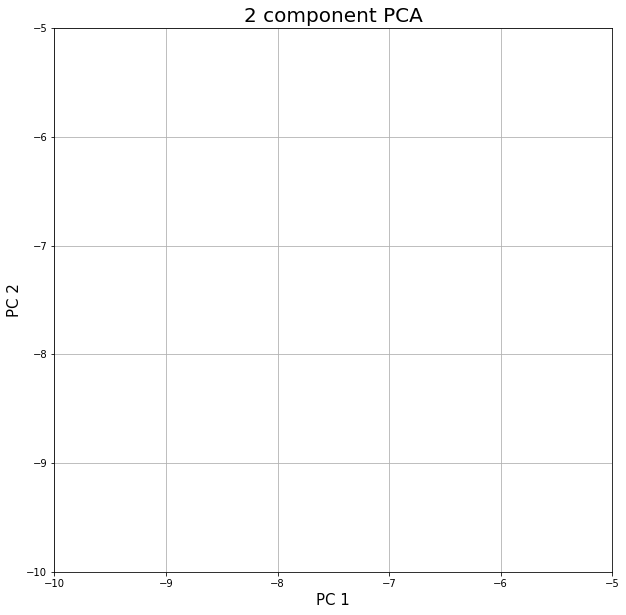

In [91]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.xlim(-10,-5)
plt.ylim(-10,-5)
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['Close'] == target
    ax.scatter(principal_df.loc[indicesToKeep, 'PC 1']
               , principal_df.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.grid()